In [2]:
import pandas as pd
data = pd.read_excel("/mnt/f/HeLa/ayu/For prediction modeling.xlsx", index_col=0, sheet_name='Genus OTUs')
data.shape
data.head(2)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Faecalibacterium,0.153629,0.166622,0.168463,0.147737,0.151862,0.272817,0.240526,0.183581,0.159364,0.179426,0.181947,0.175909
Bifidobacterium,0.162069,0.136300,0.085470,0.144926,0.130479,0.395202,0.083105,0.111890,0.103097,0.244660,0.176965,0.268716


In [3]:
ts = pd.read_excel("/mnt/f/HeLa/ayu/For prediction modeling.xlsx", skiprows=2, sheet_name='Sheet3')
ts=ts.dropna(axis=1, how='all')
ts=ts.dropna(axis=0, how='all')
ts.shape
ts.head(2)

,Unnamed: 13,Temp,Humidity
0,Jan,20.111111,59.259259
1,Feb,18.758621,64.344828


In [39]:
import numpy as np
import matplotlib.pyplot as plt
a = data.iloc[0,:]
b = ts['Temp']
a=np.array(a)
b=np.array(b)
print(a[0],b[0])

0.153628708901363 20.11111111111111


0.9758014756290072


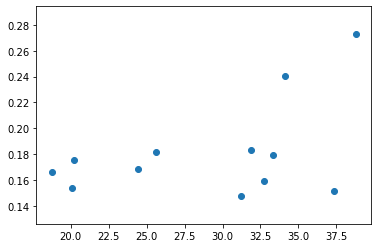

In [33]:
dot = np.dot(a, b)
norma = np.linalg.norm(a)
normb = np.linalg.norm(b)
cos = dot / (norma * normb)
print(cos)
plt.scatter(b,a)

[[0.15362871 0.16662167 0.16846334 0.14773673 0.15186168 0.27281686
  0.24052594 0.18358137 0.15936435 0.17942615 0.18194714 0.17590934]] [[20.11111111 18.75862069 24.4516129  31.2173913  37.31428571 38.78378378
  34.08571429 31.84375    32.75       33.35294118 25.61764706 20.25      ]] 64.66508392671047 0.6420716831389723 103.21073197616528 0.9758014756290072 0.9758014756290072 [[11.70961771]]


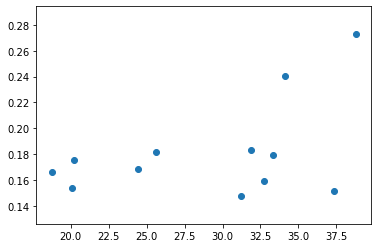

In [41]:
from sklearn.metrics.pairwise import cosine_similarity
aa = a.reshape(1,12)
ba = b.reshape(1,12)
cos_lib = cosine_similarity(aa, ba)
print(aa,ba,dot,norma,normb,cos,cos_lib[0][0],cos_lib*12)
plt.scatter(ba,aa)

In [48]:
import math
angle_in_radians = math.acos(cos)
print(math.degrees(angle_in_radians))

12.630244480552777


In [49]:
print(0.00706797/cos,cos/0.00706797,0.00706797*cos,12*math.degrees(angle_in_radians)/math.pi,math.pi/(12*math.degrees(angle_in_radians)))

0.0072432458615047145 138.05965158723188 0.006896935555701554 48.243980196938466 0.02072797468032


0.0


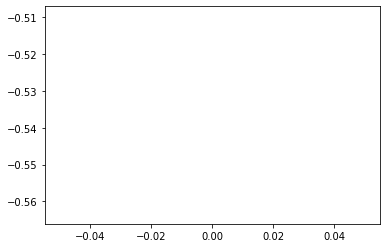

In [75]:
#https://github.com/qingkaikong/blog/tree/master/2017_01_detect_periodic_signal
from scipy import fft, arange, signal
#tempC=b
tempC=np.sin(len(b))
tempNorm = tempC - np.mean(tempC)
plt.plot(tempC)
print(tempNorm)

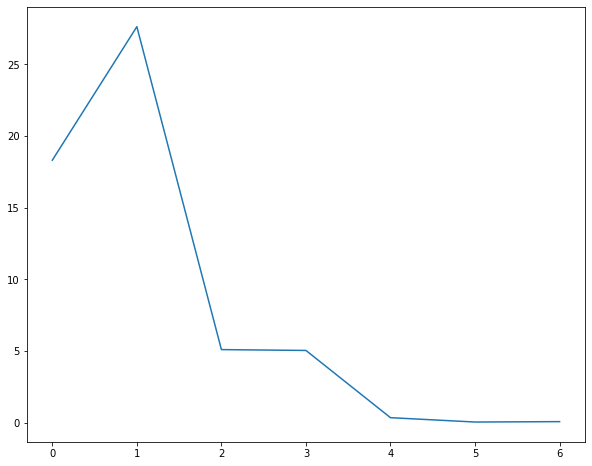

In [66]:
fs = 12
f, Pxx = signal.periodogram(tempNorm, fs = fs, window='hanning', scaling='spectrum')
#f, Pxx = signal.periodogram(tempNorm, fs = fs, window='fft', scaling='spectrum')
plt.figure(figsize = (10, 8))
plt.plot(f, Pxx)

[0.         0.08333333 0.16666667 0.25       0.33333333 0.41666667
 0.5        0.58333333 0.66666667 0.75       0.83333333 0.91666667]


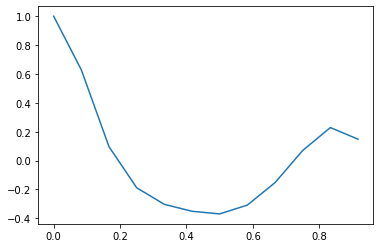

In [72]:
from statsmodels import api as sm
acf = sm.tsa.acf(tempNorm, nlags=len(tempNorm))
lag = arange(len(tempNorm)) / 2. / 6.
plt.plot(lag, acf)
print(lag)

[ 2.18188326+0.j         -0.16591691+0.00989032j  0.13563814+0.09050337j
 -0.12608168-0.11163723j -0.00896535+0.08014375j  0.0313069 -0.02645929j
 -0.07030096+0.j          0.0313069 +0.02645929j -0.00896535-0.08014375j
 -0.12608168+0.11163723j  0.13563814-0.09050337j -0.16591691-0.00989032j] 12


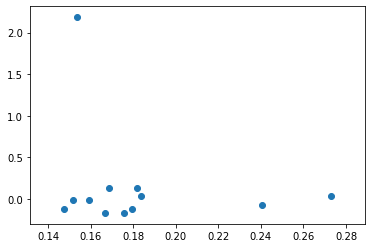

In [22]:
import scipy as sp
import scipy.fftpack
temp = a
#temp = b
temp_fft = sp.fftpack.fft(temp)
print(temp_fft,len(temp_fft))
plt.scatter(temp,temp_fft)

[4.76061457e+00 2.76262401e-02 2.65885657e-02 2.83594593e-02
 6.50339837e-03 1.68021643e-03 4.94222524e-03 1.68021643e-03
 6.50339837e-03 2.83594593e-02 2.65885657e-02 2.76262401e-02] 12


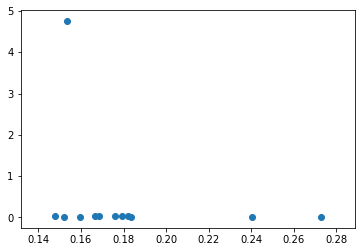

In [23]:
temp_psd = np.abs(temp_fft) ** 2
print(temp_psd,len(temp_psd))
plt.scatter(temp,temp_psd)

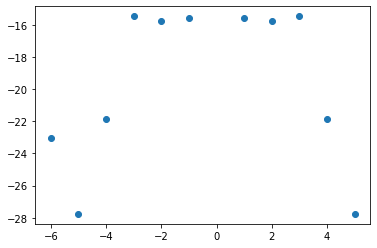

In [24]:
fftfreq = sp.fftpack.fftfreq(len(temp_psd), 1. / 12)
i = abs(fftfreq) > 0
#i = fftfreq > 0
plt.scatter(fftfreq[i], 10 * np.log10(temp_psd[i]))

In [30]:
import statsmodels.api as sm
#if(max(sm.tsa.acf(np.array(df.iloc[i]), nlags=12))!=1):
print((sm.tsa.acf(a, nlags=12)))

[ 1.          0.31150047 -0.30354991 -0.25125967 -0.05992153 -0.19178332
 -0.11854059  0.03197848  0.05596741  0.00931476  0.00556213  0.01073177]


/home/animeshs/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


(0, 'Faecalibacterium', array([ 1.        ,  0.31150047, -0.30354991, -0.25125967, -0.05992153,
       -0.19178332, -0.11854059,  0.03197848,  0.05596741,  0.00931476,
        0.00556213,  0.01073177]))
(1, 'Bifidobacterium', array([ 1.        , -0.18552172, -0.02226848, -0.45187151,  0.15901265,
       -0.02457722,  0.30847599, -0.08301071, -0.05477172, -0.0998049 ,
       -0.03691822, -0.00874414]))
(2, 'Bacteroides', array([ 1.        , -0.05243536,  0.47996502, -0.06421435,  0.25746569,
       -0.39902979,  0.10323196, -0.31739699, -0.15784787, -0.21046895,
       -0.05877889, -0.08049046]))
(3, 'Lactobacillus', array([ 1.        ,  0.41454371,  0.38401322, -0.05486186, -0.18870864,
       -0.2457329 , -0.25206386, -0.29372869, -0.16151896, -0.13328967,
        0.015316  ,  0.01603166]))
(4, 'Streptococcus', array([ 1.        ,  0.16917928, -0.35248973, -0.07305164,  0.15884727,
        0.20592899, -0.10628282, -0.21037236, -0.14758169, -0.09501653,
       -0.03045828, -0.01870248]

(71, 'f__Rs-045;g_', array([ 1.        ,  0.21260116, -0.10609737,  0.07085027,  0.22411523,
        0.03598193, -0.30777111, -0.08168085, -0.17078174, -0.17785411,
       -0.11657217, -0.08279124]))
(72, 'Enterococcus', array([ 1.00000000e+00,  4.69410616e-01, -1.24431064e-01, -1.30578144e-01,
       -1.08773794e-01, -1.50050785e-01, -1.69394934e-01, -1.84102473e-01,
       -1.08915923e-01,  1.13788020e-04,  1.15407021e-02, -4.81798817e-03]))
(73, 'Bilophila', array([ 1.        , -0.32567237, -0.11540403,  0.15111528, -0.25908707,
        0.11244077,  0.14539297, -0.19597936,  0.22278273, -0.09939515,
       -0.05033892, -0.08585486]))
(74, 'CW040;f__;g__', array([ 1.        , -0.16753389,  0.05054081, -0.09714459, -0.40855841,
        0.13662696, -0.07349158,  0.29869506,  0.05877301, -0.00577556,
       -0.11387729, -0.17825449]))
(75, 'Megasphaera', array([ 1.        , -0.05013117, -0.19602564, -0.17565374, -0.37094191,
        0.07115726,  0.36127795, -0.12618799,  0.0433901 , -0.

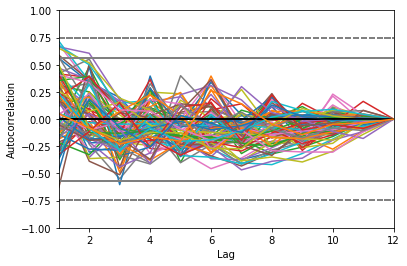

In [31]:
from pandas.plotting import autocorrelation_plot
for i in range(len(data)):
    print((i,data.index.values[i],sm.tsa.acf(np.array(data.iloc[i]), nlags=12)))
    autocorrelation_plot(np.array(data.iloc[i]))
#autocorrelation_plot(df)

In [ ]:
from statsmodels.tsa.ar_model import AR
for i in range(len(df)):
    X = np.array(df.iloc[i])
    train_data = X[0:6]
    test_data = X[6:]
    #model = AR(train_data)
    model = AR(X)
    model_fitted = model.fit()
    #print(i,len(X),train_data,test_data,model_fitted.k_ar,model_fitted.params)
    print(i,len(X),model_fitted.k_ar,model_fitted.params)

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.iloc[5])#, lags=12)#, ax=axes[0])
plot_pacf(df.iloc[5])#, lags=12)#, ax=axes[1])

In [ ]:
dfT=df.transpose()
dfT['ds'] = pd.date_range(start='1/1/2019', periods=len(dfT), freq='M')
dfT.columns

In [ ]:
from fbprophet import Prophet

In [ ]:
m = Prophet()
dfT['y']=dfT['Bifidobacterium']
m.fit(dfT)

In [ ]:
future = m.make_future_dataframe(periods=120, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)

In [ ]:
future.tail()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
list(le.classes_)
values=le.transform(y)
print(values)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(le.transform(y).reshape(-1,1))
enc.categories_
#print(enc.transform(le.transform(y).reshape(-1,1)))

In [ ]:
#print(np.array(tf.one_hot(le.transform(y), depth=3)))
#vocabulary_feature_column =  tf.feature_column.categorical_column_with_vocabulary_list(key=["P", "V", "K"],vocabulary_list=["P", "V", "K"])
import numpy as np
n_values = np.max(values) + 1
Y=np.eye(n_values)[values]

In [ ]:
#Y=pd.DataFrame(np.array(tf.one_hot(le.transform(y), depth=3)))
Y=pd.DataFrame(Y)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)
X_train.to_csv("X_train.csv", index = False, header = None)
X_test.to_csv("X_test.csv", index = False, header = None)
Y_train.to_csv("Y_train.csv", index = False, header = None)
Y_test.to_csv("Y_test.csv", index = False, header = None)
Y_test.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape[1],Y_train.shape[1] 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()
classifier.add(Dense(units = 9, activation = 'relu', input_dim=X_train.shape[1]))
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dense(units = Y_train.shape[1] , activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
classifier.fit(X_train, Y_train, batch_size = X_train.shape[1],epochs = 100)

In [ ]:
Y_pred = classifier.predict(X_test)
#Y_pred
y_pred=(Y_pred.argmax(1)[:,None] == np.arange(Y_pred.shape[1])).astype(int)
y_pred

In [ ]:
y_test=Y_test.values
y_test=(y_test.argmax(1)[:,None] == np.arange(y_test.shape[1])).astype(int)
y_test

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
cm